In [15]:
from scipy.stats import ttest_1samp
import numpy as np


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
ages = np.array([77.32, 78.04, 77.52, 77.94, 78.64, 75.86, 76.66, 79.69, 76.42, 75.96, 77.15, 76.5, 72.92, 75.3, 74.96, 77.89, 78.31, 79.56, 76.46, 76, 76.55, 75.42, 75.59, 74.65, 78.69, 75.15, 77.28, 78.01, 79.63, 75.96, 76.72, 76.65, 76.57, 77.97, 78.94, 75.73])
ages

array([77.32, 78.04, 77.52, 77.94, 78.64, 75.86, 76.66, 79.69, 76.42,
       75.96, 77.15, 76.5 , 72.92, 75.3 , 74.96, 77.89, 78.31, 79.56,
       76.46, 76.  , 76.55, 75.42, 75.59, 74.65, 78.69, 75.15, 77.28,
       78.01, 79.63, 75.96, 76.72, 76.65, 76.57, 77.97, 78.94, 75.73])

In [20]:
ages_mean = ages.mean()
ages_mean

76.90583333333332

In [21]:
tset, pval = ttest_1samp(ages, 76)
print("p-value: ", pval)

p-value:  0.0010785005950780227


In [23]:
if pval < 0.05:
  print("H0 shall be rejected")
else:
  print("H0 shall be kept")

H0 shall be rejected


# Let's check several Hypothesis Testing approaches

In [24]:
import pandas as pd

wine_file_name = "/content/drive/MyDrive/Data analytics course/winequalityN.csv"
wine_df = pd.read_csv(wine_file_name, index_col=0)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


To have a proper test - we shall check if distribution is Normal. Let's build a kde function here.

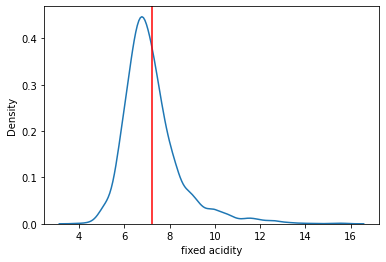

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x="fixed acidity", data=wine_df)
plt.axvline(wine_df["fixed acidity"].mean(), color="red")

Let's use some tests to identify if indeed we don't have Normal dist. with **Shapiro-Wilk** test

In [35]:
from scipy.stats import shapiro

dataSeries = wine_df["fixed acidity"][0:5000].fillna(method="pad")

stat, p = shapiro(dataSeries)

print('stat = %f p = %.30f' % (stat, p))

if p > 0.05:
  print("Normal Distribution")
else:
  print("Not normal distribution")

stat = 0.976673 p = 0.000000000000000000000000000722
Not normal distribution


In [34]:
dataSeries.isna().sum()

0

Let's generate Normal distribution data-set

In [38]:
from numpy.random import randn

normal = randn(4999)

And re-run Shapiro test

In [41]:
stat, p = shapiro(normal)

print('stat = %f p = %.30f' % (stat, p))

if p > 0.05:
  print("Normal Distribution")
else:
  print("Not normal distribution")

stat = 0.999756 p = 0.861429274082183837890625000000
Normal Distribution


Anoter test for Normality of dustribution is **D’Agostino’s K^2** Test

In [42]:
from scipy.stats import normaltest

dataSeries = wine_df["fixed acidity"][0:5000].fillna(method="pad")

stat, p = shapiro(normal)

print('stat = %f p = %.30f' % (stat, p))

if p > 0.05:
  print("Normal Distribution")
else:
  print("Not normal distribution")

stat = 0.999756 p = 0.861429274082183837890625000000
Normal Distribution
